<a href="https://colab.research.google.com/github/altered-intelligence/Machine-Learning-for-Security-Analysts/blob/master/Lab1_v2_with_Answers_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Security Analysts - Workbook </br> Spam Filter (Scikit-learn)

---




**Dataset:** https://github.com/altered-intelligence/Machine-Learning-for-Security-Analysts

**Goal:** This workbook will walk you through the steps to build, train, test, and evaluate a series of spam classifiers using the Scikit-learn machine learning library

**Outline:**
* Initial Setup
* Tokenization
* Load Training Data
* Vectorize Training Data
* Load Testing Data
* Train and Evaluate Models


## Instructions
To use Jupyter notebooks:
* To run a cell, click on the play button to the left of the code or pressh shift+enter
* You will see a busy indicator in the top left area while the runtime is executing
* A number will appear when the cell is done

To complete the workbook:
* Step through the workbook, completing the tasks in order

# Initial Setup
We'll start by downloading the data and loading the needed libraries.

In [5]:
# Download data from Github
! git clone https://github.com/altered-intelligence/Machine-Learning-for-Security-Analysts.git

# Install dependencies
! pip install nltk sklearn pandas matplotlib seaborn
data_dir = "Machine-Learning-for-Security-Analysts"

Cloning into 'Machine-Learning-for-Security-Analysts'...
remote: Enumerating objects: 4210, done.
remote: Counting objects: 100% (4210/4210), done.
remote: Compressing objects: 100% (3972/3972), done.
remote: Total 4210 (delta 235), reused 4195 (delta 226), pack-reused 0
Receiving objects: 100% (4210/4210), 14.77 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (235/235), done.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Common imports
import re, os, math, string, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

# Import Natural Language ToolKit library and download dictionaries
import nltk
nltk.download('stopwords')
nltk.download('punkt')


# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



print("\n### Libraries imported ###\n")

In [8]:
# Test email from lecture slides
test_email = """
Re: Re: East Asian fonts in Lenny. Thanks for your support.  Installing unifonts did it well for me. ;)
Nima
--
To UNSUBSCRIBE, email to debian-user-REQUEST@lists.debian.org
with a subject of "unsubscribe". Trouble? Contact listmaster@lists.debian.org
"""
print(test_email)


Re: Re: East Asian fonts in Lenny. Thanks for your support.  Installing unifonts did it well for me. ;)
Nima
--
To UNSUBSCRIBE, email to debian-user-REQUEST@lists.debian.org
with a subject of "unsubscribe". Trouble? Contact listmaster@lists.debian.org



# Tokenization
Continuing from where we left off with the slides, we'll start by creating our tokenizer.

In [ ]:
# Define tokenizer
#   The purpose of a tokenizer is to separate the features from the raw data

def tokenizer(text):
  """Separates feature words from the raw data
  Keyword arguments:
    text ---- The full email body

  :Returns -- The tokenized words; returned as a list
  """

  # Retrieve a list of punctuation characters, a list of stopwords, and a stemmer function
  punctuations = list(string.punctuation)
  stopwords = nltk.corpus.stopwords.words('english')
  stemmer = nltk.stem.PorterStemmer()


  # Set email body to lowercase, separate words and strip out punctuation
  tokens = nltk.word_tokenize(text.lower())
  tokens = [i.strip(''.join(punctuations))
            for i in tokens
            if i not in punctuations]


  # User Porter Stemmer on each token
  tokens = [stemmer.stem(i)
            for i in tokens]
  return [w for w in tokens if w not in stopwords and w != ""]

print("\n### Tokenizer defined ###\n")

## Task 1 - Tokenize an email
1. Print the full email, **test_email**
2. Print the results of **tokenizer(test_email)**

In [10]:
# Let's see how our tokenizer changes our email
print("\n- Test Email Body -\n")
print(test_email)

# Tokenize test email
print("\n - Tokenized Output -\n")
tokenized_email = tokenizer(test_email)
print(tokenized_email)






- Test Email Body -


Re: Re: East Asian fonts in Lenny. Thanks for your support.  Installing unifonts did it well for me. ;)
Nima
--
To UNSUBSCRIBE, email to debian-user-REQUEST@lists.debian.org
with a subject of "unsubscribe". Trouble? Contact listmaster@lists.debian.org


 - Tokenized Output -

['east', 'asian', 'font', 'lenni', 'thank', 'support', 'instal', 'unifont', 'well', 'nima', 'unsubscrib', 'email', 'debian-user-request', 'lists.debian.org', 'subject', 'unsubscrib', 'troubl', 'contact', 'listmast', 'lists.debian.org']


# Load Training Data
With our tokenizer defined, let's take a look at our training data.

In [11]:
# Get counts of each class
ham_count = len(os.listdir(data_dir+"/ham"))
spam_count = len(os.listdir(data_dir+"/spam"))
test_count = len(os.listdir(data_dir+"/test"))
print("\n### Class Counting Complete ###\n")


### Class Counting Complete ###



## Task 2 - Load training data
1. Create two *list()* arrays: **corpus** and **labels**
2. Load the email bodies from from the **/ham** and **/spam** directories into the *corpus* array
3. Load the labels for each email into the *labels* array

\* The lengths of *corpus* and *labels* should be identical

In [12]:
# Load the training data
#   "corpus" is used to store all of the email bodies in a list
#   "labels" is used to store all of the labes for those email bodies

# Data and label arrays
# (Write code here)
corpus = []   # X values
labels = []   # Y values




# Load all of the emails from the "ham" directory
print("- Loading Ham -")
# (Write code here)
for each in os.listdir(data_dir + '/ham'):
  with open(data_dir + '/ham/' + each, 'r') as f:
    corpus.append(f.read())
    labels.append("ham")




# Load all of the emails from the "spam" directory
print("- Loading Spam -")
# (Write code here)
for each in os.listdir(data_dir + '/spam'):
  with open(data_dir + '/spam/'+each, 'r') as f:
    corpus.append(f.read())
    labels.append("spam")





# (Keep the following lines)
print("\n### Loading Complete ###\n")

- Loading Ham -
- Loading Spam -

### Loading Complete ###



Ham: 2359
Spam: 1102


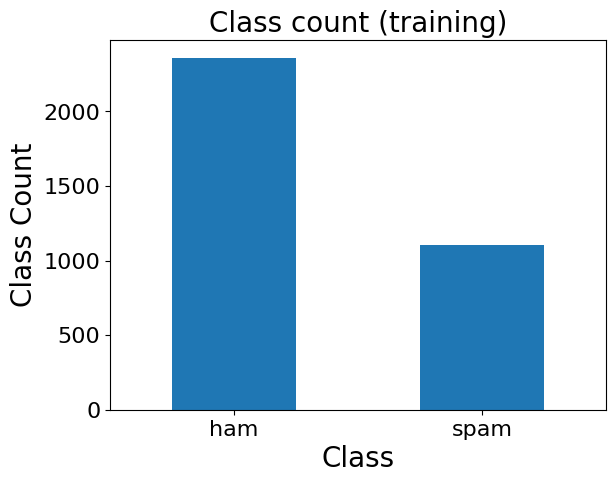

In [13]:
# Print counts of each class
count_classes = pd.value_counts(labels)
print("Ham:", count_classes['ham'])
print("Spam:", count_classes['spam'])

# Graph counts of each class
count_classes.plot(kind="bar", fontsize=16)
plt.title("Class count (training)", fontsize=20)
plt.xticks(rotation="horizontal")
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)
plt.show()

## Task 2a (optional) - View training data
1. Show the full text body of a random email in *corpus*
2. Show the *tokenized* result of the same email

In [14]:
# Let's see how our corpus looks



print("\n- Email Body -\n")
#(Write code here)
print(corpus[7])






print("\n- Tokenized Output -\n")
# (Write code here)
print(tokenizer(corpus[7]))







- Email Body -

Re: Debian And Advanced Layer3 9924TAndreas Weber put forth on 4/6/2010 4:12 PM:
> Stan Hoeppner wrote:
>> Please forgive me if my choice of words offended you.  That wasn't my
>> intention at all.  I was speaking figuratively, not literally.
> 
> No problem, thanks for your feedback. Your point is clear and I can very
> well understand your disagreement with my recommendation.
> 
>> My point was
>> that swapping out the production switch, which probably has others users
>> plugged in, ...
> 
> I assumed differently here (new switch in the house, first tests), but
> the OP isn't precise about that IMO.
> 
> I'll try to be as little ambiguous as possible the next time, sorry.

No sweat.  We're all on the same team.  I wish Alejandro would send an
update.  I'm kinda curious as to what was/is actually causing the problem.
>From the very sparse info he provided, the cause could really be nearly
anything.

Come to think of it, has he even replied to any of our posts?  It do

# Vectorize the Data
Now that the training data has been loaded, we'll train the vectorizers to turn our features into numbers.




## Task 3 - Train the vectorizers
1. Create the count vectorizer **cVec** using the **CountVectorizer** function
2. Configure *cVec* to use the *tokenizer* function from earlier
3. Perform **fit_transform** on *cVec* to train the vectorizer with the *corpus*\
a. Save the result as **count_X**


4. Create the TF-IDF vectorizer **tVec** using the **TfidfVectorizer** function
5. Configure *tVec* to use the *tokenizer* function from earlier
6. Perform **fit_transform** on *tVec* to train the vectorizer with the *corpus*\
a. Save the result as **tfidf_X**

In [17]:
# Vectorize the training inputs -- Takes about 90 seconds to complete
#   There are two types of vectors:
#     1. Count vectorizer
#     2. Term Frequency-Inverse Document Frequency (TF-IDF)


print("- Training Count Vectorizer -")
# (Write code here)
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(corpus)




print("- Training TF-IDF Vectorizer -")
# (Write code here)
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(corpus)




# (Keep the following lines)
print("\n### Vectorizing Complete ###\n")

- Training Count Vectorizer -
- Training TF-IDF Vectorizer -

### Vectorizing Complete ###



## Task 3a (optional) - Count the test email tokens
1. Print the count of each *token* from **test_email**

In [15]:
# Manually perform term count on test_email
# (Write code here)
for i in list(dict.fromkeys(tokenized_email)):
  print("{} - {}".format(tokenized_email.count(i), i))





1 - east
1 - asian
1 - font
1 - lenni
1 - thank
1 - support
1 - instal
1 - unifont
1 - well
1 - nima
2 - unsubscrib
1 - email
1 - debian-user-request
2 - lists.debian.org
1 - subject
1 - troubl
1 - contact
1 - listmast


## Task 3b (optional) - View the test email vectorizers
1. Create a new **CountVectorizer** and **TfidfVectorizer** for demonstration
2. Train the new vectorizers on **test_email** using **fit_transform**
3. Print the results of each *transform*

In [16]:
example_cVec = CountVectorizer(tokenizer=tokenizer)
example_X = example_cVec.fit_transform([test_email])

print("\n- Count Vectorizer (test_email) -\n")
# (Write code here)
print(example_X)



# (Keep the following lines)
print()
print("="* 50)
print()

example_tVec = TfidfVectorizer(tokenizer=tokenizer)
example_X = example_tVec.fit_transform([test_email])



print("\n- TFidf Vectorizer (test_email) -\n")
# (Write code here)
print(example_X)





- Count Vectorizer (test_email) -

  (0, 3)	1
  (0, 0)	1
  (0, 5)	1
  (0, 7)	1
  (0, 13)	1
  (0, 12)	1
  (0, 6)	1
  (0, 15)	1
  (0, 17)	1
  (0, 10)	1
  (0, 16)	2
  (0, 4)	1
  (0, 2)	1
  (0, 9)	2
  (0, 11)	1
  (0, 14)	1
  (0, 1)	1
  (0, 8)	1



- TFidf Vectorizer (test_email) -

  (0, 8)	0.20412414523193154
  (0, 1)	0.20412414523193154
  (0, 14)	0.20412414523193154
  (0, 11)	0.20412414523193154
  (0, 9)	0.4082482904638631
  (0, 2)	0.20412414523193154
  (0, 4)	0.20412414523193154
  (0, 16)	0.4082482904638631
  (0, 10)	0.20412414523193154
  (0, 17)	0.20412414523193154
  (0, 15)	0.20412414523193154
  (0, 6)	0.20412414523193154
  (0, 12)	0.20412414523193154
  (0, 13)	0.20412414523193154
  (0, 7)	0.20412414523193154
  (0, 5)	0.20412414523193154
  (0, 0)	0.20412414523193154
  (0, 3)	0.20412414523193154


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Load Testing Data
With our vectorizers trained, we're going to use them to calculate the probabilities on our testing data.

In [ ]:
# List first 10 files in "test" directory
#   The labels for each email are in the file name
os.listdir(data_dir + '/test')[:10]

## Task 4 - Load the testing data
1. Create two *list()* arrays: **test_corpus** and **test_labels**
2. Load the email bodies from from the **/test** directory into the *test_corpus* array
3. Load the labels for each email into the *test_labels* array

\* The lengths of *test_corpus* and *test_labels* should be identical

In [18]:
# Load the testing data
#   "test_corpus" is used to store all of the email bodies in a list
#   "test_labels" is used to store all of the labes for those email bodies

test_corpus = []   # X values
test_labels = []   # Y values

# Data and label arrays
# (Write code here)



# Load all of the emails from the "test" directory
# (Write code here)

print("- Loading Test Set -")
for filename in os.listdir(data_dir + '/test'):
  with open(data_dir + '/test/' + filename, 'r') as f:
    test_corpus.append(f.read())
    label = re.split("txt\.", filename)[1]
    test_labels.append(label)


# (Keep the following lines)
print("\n### Loading Complete ###\n")

- Loading Test Set -

### Loading Complete ###



In [ ]:
# Print counts of each class
count_test_classes = pd.value_counts(test_labels)
print("Ham:", count_test_classes['ham'])
print("Spam:", count_test_classes['spam'])

# Graph counts of each class
count_test_classes.plot(kind="bar", fontsize=16)
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation="horizontal")
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)
plt.show()

## Task 5 - Vectorize the testing data
1. Use **cVec** to *transform* **test_corpus**\
a. Save the result as **test_count_X**

2. Use **tVec** to *transform* **test_corpus**\
a. Save the result as **test_tfidf_X**

In [19]:
# Vectorize the testing inputs -- Takes about 30 seconds to complete
#   Use 'transform' instead of 'fit_transform' because we've already trained our vectorizer


print("- Count Vectorizer -")
# (Write code here)
test_count_X = cVec.transform(test_corpus)



print("- Tfidf Vectorizer -")
# (Write code here)
test_tfidf_X = tVec.transform(test_corpus)



# (Keep the following lines)
print("\n### Vectorizing Complete ###\n")

- Count Vectorizer -
- Tfidf Vectorizer -

### Vectorizing Complete ###



# Test and Evaluate the Models
OK, we have our training data loaded and our testing data loaded. Now it's time to train and evaluate our models.

But first, we're going to define a helper function to display our evaluation reports.

In [20]:
# Define report generator
# (No action Needed)

def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model

  :Returns -- N/A
  """

  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T

  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix,
              annot=True,
              fmt="d",
              linewidths=.5,
              square = True,
              cmap = 'Blues',
              annot_kws={"size": 16},
              xticklabels=['ham', 'spam'],
              yticklabels=['ham', 'spam'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()


print("\n### Report Generator Defined ###\n")


### Report Generator Defined ###



## Task 6a - Train and evaluate the MNB-TFIDF model
1. Create **mnb_tfidf** as a **MultinomialNB()** constructor
2. Use **fit** to train *mnb_tfidf* on the training data (*tfidf_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_tfidf_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *mnb_tfidf* to calculate model accuracy; save the results as **score_mnb_tfidf**\
b. Use the **predict** function in *mnb_tfidf* to generate model predictions; save the results as **predictions_mnb_tfidf**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_mnb_tfidf**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_mnb_tfidf**


### Model Built ###

              precision    recall  f1-score   support

         ham       0.85      1.00      0.92       590
        spam       1.00      0.61      0.76       276

    accuracy                           0.88       866
   macro avg       0.92      0.80      0.84       866
weighted avg       0.89      0.88      0.87       866



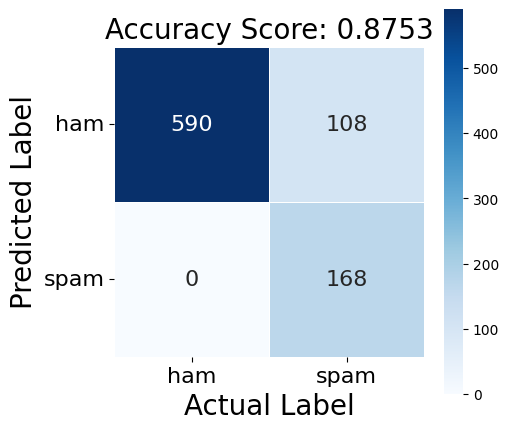

In [21]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
# (Write code here)
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
# (Write code here)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)


# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

## Task 6b - Train and evaluate the MNB-Count model
1. Create **mnb_count** as a **MultinomialNB()** constructor
2. Use **fit** to train *mnb_count* on the training data (*count_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_count_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *mnb_count* to calculate model accuracy; save the results as **score_mnb_count**\
b. Use the **predict** function in *mnb_count* to generate model predictions; save the results as **predictions_mnb_count**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_mnb_count**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_mnb_count**


### Model Built ###

              precision    recall  f1-score   support

         ham       0.96      0.96      0.96       590
        spam       0.91      0.92      0.91       276

    accuracy                           0.94       866
   macro avg       0.93      0.94      0.94       866
weighted avg       0.94      0.94      0.94       866



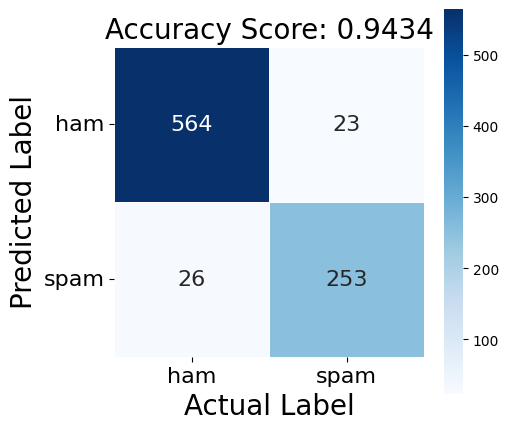

In [22]:
# Multinomial Naive Bayesian with Count Vectorizer

# Train the model
# (Write code here)
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
# (Write code here)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(test_labels, predictions_mnb_count)
creport_mnb_count = classification_report(test_labels, predictions_mnb_count)



# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

## Task 6c - Train and evaluate the LGS-TFIDF model
1. Create **lgs_tfidf** as a **LogisticRegression()** constructor, using the **lbfgs** *solver*
2. Use **fit** to train *lgs_tfidf* on the training data (*tfidf_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_tfidf_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *lgs_tfidf* to calculate model accuracy; save the results as **score_lgs_tfidf**\
b. Use the **predict** function in *lgs_tfidf* to generate model predictions; save the results as **predictions_lgs_tfidf**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_lgs_tfidf**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_lgs_tfidf**


### Model Built ###

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       590
        spam       0.99      0.88      0.93       276

    accuracy                           0.96       866
   macro avg       0.97      0.94      0.95       866
weighted avg       0.96      0.96      0.96       866



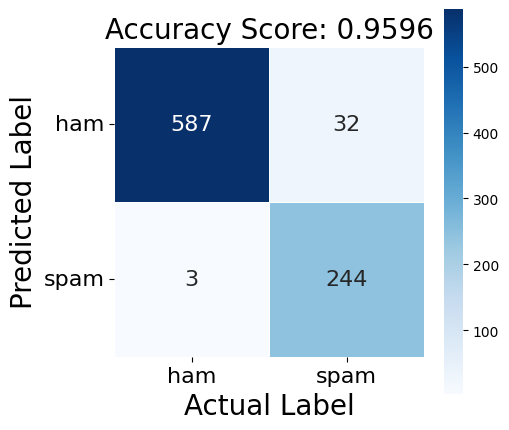

In [23]:
# Logistic Regression with TF-IDF

# Train the model
# (Write code here)
lgs_tfidf = LogisticRegression(solver='lbfgs')
lgs_tfidf.fit(tfidf_X, labels)



# Test the mode (score, predictions, confusion matrix, classification report)
# (Write code here)
score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
cmatrix_lgs_tfidf = confusion_matrix(test_labels, predictions_lgs_tfidf)
creport_lgs_tfidf = classification_report(test_labels, predictions_lgs_tfidf)




# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)

## Task 6d - Train and evaluate the LGS-Count model
1. Create **lgs_count** as a **LogisticRegression()** constructor, using the **lbfgs** *solver*
2. Use **fit** to train *lgs_count* on the training data (*count_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_count_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *lgs_count* to calculate model accuracy; save the results as **score_lgs_count**\
b. Use the **predict** function in *lgs_count* to generate model predictions; save the results as **predictions_lgs_count**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_lgs_count**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_lgs_count**


### Model Built ###

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       590
        spam       0.97      0.96      0.96       276

    accuracy                           0.98       866
   macro avg       0.98      0.97      0.97       866
weighted avg       0.98      0.98      0.98       866



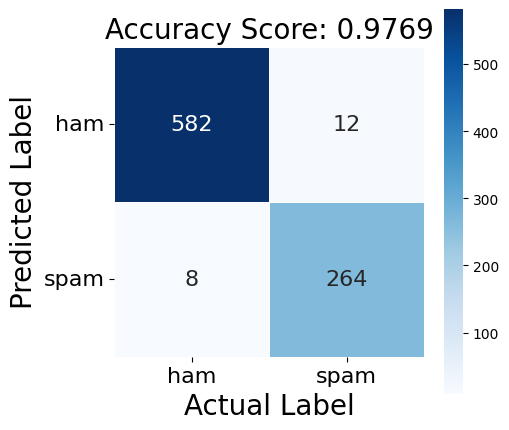

In [24]:
# Logistic Regression with Count Vectorizer

# Train the model
# (Write code here)
lgs_count = LogisticRegression(solver='lbfgs')
lgs_count.fit(count_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
# (Write code here)
score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_count.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(test_labels, predictions_lgs_count)
creport_lgs_count = classification_report(test_labels, predictions_lgs_count)



# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)

In [26]:
# Real world spam email (Retrieved 5/20/2019)

test_spam_email = """Your latest issue is available NOW! If you do not want issue notifications, click here to unsubscribe.
logo
Hi GEORGE,

Your latest digital issue is available NOW!

Enjoy all the latest from InStyle right on your phone, computer or tablet!

View your library now.

READ NOW
Your digital issue is delivered by emagazines.com. To unsubscribe, go here. Do not reply to this email. For more information, review our Privacy Policy and customer care options visit Customer Support.

Copyright © 2017 - 2019 eMagazines. All Rights Reserved. 230 W Huron St., Ste 500, Chicago, IL 60654
"""
print(test_spam_email)

Your latest issue is available NOW! If you do not want issue notifications, click here to unsubscribe.
logo
Hi GEORGE,

Your latest digital issue is available NOW!

Enjoy all the latest from InStyle right on your phone, computer or tablet!

View your library now.

READ NOW
Your digital issue is delivered by emagazines.com. To unsubscribe, go here. Do not reply to this email. For more information, review our Privacy Policy and customer care options visit Customer Support.

Copyright © 2017 - 2019 eMagazines. All Rights Reserved. 230 W Huron St., Ste 500, Chicago, IL 60654



## Task 7 - Make a prediction
1. Use the *vectorizers* and *models* created to perform predictions on **test_email** and **test_spam_email**

In [27]:
# Enter an email to be predicted
# (Write code here)

working_email = test_spam_email


test_email_tfidf = tVec.transform([working_email])
test_email_count = cVec.transform([working_email])

test_email_mnb_tfidf_pred = mnb_tfidf.predict(test_email_tfidf)
test_email_mnb_count_pred = mnb_count.predict(test_email_count)
test_email_lgs_tfidf_pred = lgs_tfidf.predict(test_email_tfidf)
test_email_lgs_count_pred = lgs_count.predict(test_email_count)


print(working_email)



# (Keep the following lines)
print("\n- Model Predictions -\n")
print("MNB/TFIDF:", test_email_mnb_tfidf_pred)
print("MNB/Count:", test_email_mnb_count_pred)

print("LGS/TFIDF:", test_email_lgs_tfidf_pred)
print("LGS/Count:", test_email_lgs_count_pred)

Your latest issue is available NOW! If you do not want issue notifications, click here to unsubscribe.
logo
Hi GEORGE,

Your latest digital issue is available NOW!

Enjoy all the latest from InStyle right on your phone, computer or tablet!

View your library now.

READ NOW
Your digital issue is delivered by emagazines.com. To unsubscribe, go here. Do not reply to this email. For more information, review our Privacy Policy and customer care options visit Customer Support.

Copyright © 2017 - 2019 eMagazines. All Rights Reserved. 230 W Huron St., Ste 500, Chicago, IL 60654


- Model Predictions -

MNB/TFIDF: ['ham']
MNB/Count: ['spam']
LGS/TFIDF: ['spam']
LGS/Count: ['spam']
